In [1]:
import pandas as pd
df = pd.read_csv('homeprices.csv')
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


## Using pandas to create dummy variables

In [2]:
dummies = pd.get_dummies(df.town).astype(int)
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


### Concatenating the dataframe with the dummy variables

In [3]:
merged = pd.concat([df,dummies],axis = 'columns')
merged


,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


### Dropping one column to avoid multi-colinearity

In [4]:
final = merged.drop(['town','west windsor'],axis = 'columns')
final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


# Dummy Variables Trap
When you can derive one variable from other variables, they are known to be multi-colinear. Here if you know values of california and georgia then you can easily infer value of new jersey state, i.e. california=0 and georgia=0. Therefore, these state variables are called to be multi-colinear. In this situation linear regression won't work as expected. Hence you need to drop one column.

**NOTE: sklearn library takes care of dummy variable trap hence even if you don't drop one of the state columns it is going to work, however we should make a habit of taking care of dummy variable trap ourselves just in case library that you are using is not handling this for you.**


In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [6]:
x = final.drop(['price'],axis = 'columns')
x

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [7]:
y = final.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [8]:
model.fit(x,y)

LinearRegression()

In [9]:
model.predict(pd.DataFrame([[2800,0,1]],columns = ['area','monroe township','robinsville']))

array([590775.63964739])

In [10]:
model.predict(pd.DataFrame([[3400,0,0]],columns = ['area','monroe township','robinsville']))

array([681241.66845839])

In [11]:
model.score(x,y)

0.9573929037221872

# Using One Hot Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#### Encode categorical values into numeric labels using "le.fit_transform(data)"
in this case towns are the categorical values,hence they are encoded with numeric labels(i.e. 0,1,2) 


In [13]:
dfle = df
dfle.town = le.fit_transform(dfle.town)
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


We have the town and area columns in x 
convert them into an array for better calculations

In [14]:
x = dfle[['town','area']].values
x

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]])

In [15]:
y = dfle['price']
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

#### Import OneHotEncoder and ColumnTransformer 

In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

##### ohe = ColumnTransformer(
    transformers = [("encoder",OneHotEncoder(),[0])],
    remainder = 'passthrough')

    
transformers = [("name",transformer_object,column_indices)]

in this case:

"encoder" → Name of the transformation.

OneHotEncoder() → Converts categorical variables into one-hot encoded format.

[0] → Specifies the first column (index 0) to apply the transformation.

remainder = 'passthrough'
Specifies what to do with the columns that are not transformed.



In [17]:
ohe = ColumnTransformer(
    transformers = [("encoder",OneHotEncoder(),[0])],
    remainder = 'passthrough')

#### x is One Hot encoded
When you apply fit_transform(), ColumnTransformer internally applies transformations column-wise and returns a NumPy array (instead of a Pandas DataFrame).

In [18]:
x = ohe.fit_transform(x) #monroe,robinsville,west windsor
x

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

#### Removing a column to avoid multi-colinearity
in this case monroe township is removed

x = x[:,1:]          --Numpy Array Slicing
- : (before the comma) → Selects all rows.

- 1: (after the comma) → Selects columns starting from index 1 (i.e., excludes the first column).

In [19]:
x = x[:,1:] # robinsville,west windsor are remaining
x

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [20]:
model.fit(x,y)

LinearRegression()

In [21]:
model.predict([[1,0,2800]]) #robinsville

array([590775.63964739])

In [22]:
model.predict([[0,1,3400]])  #west windsor

array([681241.6684584])

# Exercise
At the same level as this notebook on github, there is an Exercise folder that contains carprices.csv. This file has car sell prices for 3 different models. First plot data points on a scatter plot chart to see if linear regression model can be applied. If yes, then build a model that can answer following questions,

**1) Predict price of a mercedez benz that is 4 yr old with mileage 45000**

**2) Predict price of a BMW X5 that is 7 yr old with mileage 86000**

**3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())****

In [23]:
df = pd.read_csv("carprices.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


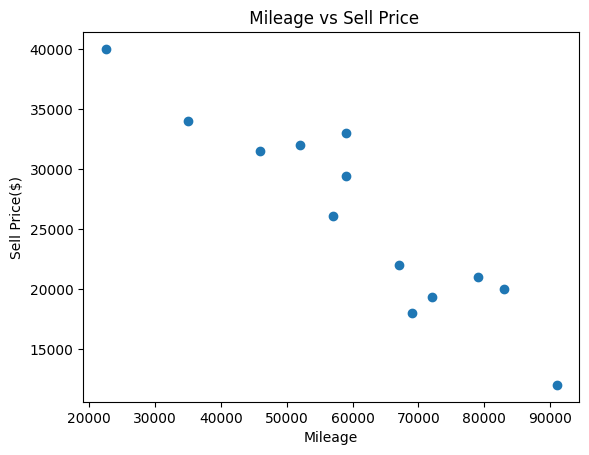

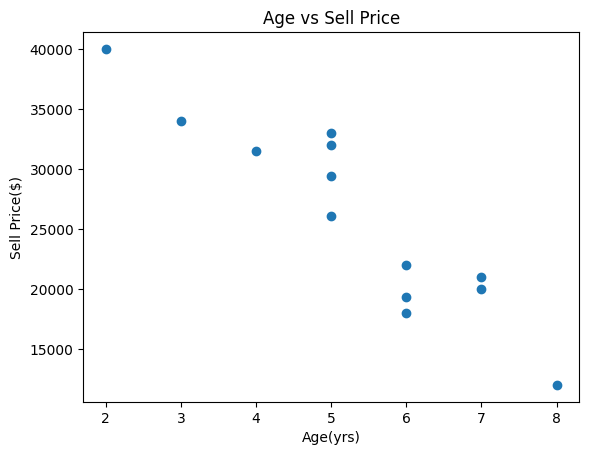

In [24]:
from matplotlib import pyplot as plt

#for Mileage vs Sell Price
plt.scatter(df[['Mileage']],df[['Sell Price($)']])
plt.xlabel('Mileage')
plt.ylabel('Sell Price($)')
plt.title(" Mileage vs Sell Price")
plt.show()

#for Age vs Sell Price
plt.scatter(df[['Age(yrs)']],df[['Sell Price($)']])
plt.xlabel('Age(yrs)')
plt.ylabel('Sell Price($)')
plt.title("Age vs Sell Price")
plt.show()


#### Since the two graphs have some sort of linearity therefore Linear Regression is a good choice

In [25]:
dummies = pd.get_dummies(df['Car Model']).astype(int)
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [26]:
merged = pd.concat([dummies,df], axis = 'columns')
merged

,Audi A5,BMW X5,Mercedez Benz C class,Car Model,Mileage,Sell Price($),Age(yrs)
0,0,1,0,BMW X5,69000,18000,6
1,0,1,0,BMW X5,35000,34000,3
2,0,1,0,BMW X5,57000,26100,5
3,0,1,0,BMW X5,22500,40000,2
4,0,1,0,BMW X5,46000,31500,4
5,1,0,0,Audi A5,59000,29400,5
6,1,0,0,Audi A5,52000,32000,5
7,1,0,0,Audi A5,72000,19300,6
8,1,0,0,Audi A5,91000,12000,8
9,0,0,1,Mercedez Benz C class,67000,22000,6


In [27]:
final = merged.drop(['Car Model','Audi A5'],axis = 'columns')
final

,BMW X5,Mercedez Benz C class,Mileage,Sell Price($),Age(yrs)
0,1,0,69000,18000,6
1,1,0,35000,34000,3
2,1,0,57000,26100,5
3,1,0,22500,40000,2
4,1,0,46000,31500,4
5,0,0,59000,29400,5
6,0,0,52000,32000,5
7,0,0,72000,19300,6
8,0,0,91000,12000,8
9,0,1,67000,22000,6


In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [29]:
x = final.drop(['Sell Price($)'],axis = 'columns')
x

,BMW X5,Mercedez Benz C class,Mileage,Age(yrs)
0,1,0,69000,6
1,1,0,35000,3
2,1,0,57000,5
3,1,0,22500,2
4,1,0,46000,4
5,0,0,59000,5
6,0,0,52000,5
7,0,0,72000,6
8,0,0,91000,8
9,0,1,67000,6


In [30]:
y = final['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [31]:
model.fit(x,y)

LinearRegression()

In [32]:
#price of a mercedez benz that is 4 yr old with mileage 45000
model.predict(pd.DataFrame([[0,1,45000,4]],columns =['BMW X5', 'Mercedez Benz C class' , 'Mileage' , 'Age(yrs)'] ))        

array([36991.31721062])

In [33]:
#price of a BMW X5 that is 7 yr old with mileage 86000
model.predict(pd.DataFrame([[1,0,86000,7]],columns =['BMW X5', 'Mercedez Benz C class' , 'Mileage' , 'Age(yrs)']) ) 

array([11080.74313219])

In [34]:
model.score(x,y)

0.9417050937281083

# Using one hot encoding

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [36]:
dfle = df
dfle['Car Model'] = le.fit_transform(dfle['Car Model'])
dfle

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [37]:
x = df[['Car Model','Mileage','Age(yrs)']].values
x

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]])

In [38]:
y = df['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [39]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [40]:
ct = ColumnTransformer(
    transformers = [("Car Model",OneHotEncoder(),[0])],
    remainder = 'passthrough')

In [41]:
x = ct.fit_transform(x)
x
# Audi, BMW, Mercedes, Mileage, Age

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [42]:
x = x[:,1:] 
x
# removed Audi Column now remains BMW , Mercedes

array([[1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [43]:
model.fit(x,y)

LinearRegression()

In [44]:
#price of a mercedez benz that is 4 yr old with mileage 45000
model.predict([[0,1,45000,4]])

array([36991.31721062])

In [45]:
#price of a BMW X5 that is 7 yr old with mileage 86000
model.predict([[1,0,86000,7]])

array([11080.74313219])